# K - Nearest Neighbours Classification.

<h2> Prepared by: <a href = 'https://github.com/sagsshakya'>Sagun Shakya</a> </h2>
- GITAM Institute of Science.

### Notes:
- For a two class problem, we choose, k = odd.
- k must not be a multiple of the number of classes.
- Low values of k like k = 1 or k = 2 may be subjected to outliers.

## Manual Illustration.

In [82]:
k = 5

### Defining the Euclidean distance for three independent features and one target feature.

In [6]:
import numpy as np
def distance(arr1, arr2):
    return np.sqrt(((arr1 - arr2)**2).sum())

### Defining the dataframe.

In [13]:
import pandas as pd
a = np.random.randint(0,200, size = (10,3))
b = np.random.randint(0,2, size = (10,1))
f_names = ['f1','f2','f3','f4']
dd = pd.DataFrame(np.concatenate((a,b), axis = 1), columns = f_names)
dd

,f1,f2,f3,f4
0,31,34,131,1
1,62,165,28,1
2,157,120,80,1
3,160,89,17,1
4,100,35,36,0
5,14,141,141,1
6,44,41,21,0
7,5,162,24,1
8,177,154,130,1
9,40,75,86,1


In [22]:
x = dd.iloc[:,[0,1,2]].values
y = dd.iloc[:, 3].values
print(x, '\n\n')
print(y.reshape(-1,1))

[[ 31  34 131]
 [ 62 165  28]
 [157 120  80]
 [160  89  17]
 [100  35  36]
 [ 14 141 141]
 [ 44  41  21]
 [  5 162  24]
 [177 154 130]
 [ 40  75  86]] 


[[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]]


### New tuple: (65,23,45)

In [33]:
t = np.array([65,23,45])

### Finding the Euclidean distances from each tuple in the training data to the given tuple (unknown).

In [83]:
dd['distances'] = [distance(x[ii],t) for ii in range(x.shape[0])]
dd

,f1,f2,f3,f4,distances
0,31,34,131,1,137.437258
1,62,165,28,1,177.048016
2,157,120,80,1,211.513593
3,160,89,17,1,182.430809
4,100,35,36,0,110.372098
5,14,141,141,1,198.416229
6,44,41,21,0,62.040309
7,5,162,24,1,162.683742
8,177,154,130,1,266.507036
9,40,75,86,1,119.256027


In [64]:
yy = dd[['f4','distances' ]]

In [65]:
yyy = yy.groupby(['distances']).mean().head(k)
yyy

,f4
distances,
62.040309,0
110.372098,0
119.256027,1
137.437258,1
162.683742,1


In [78]:
m = yyy['f4'].value_counts()
m

1    3
0    2
Name: f4, dtype: int64

In [81]:
if m[1]>m[0]:
    print(1)
elif m[1]<m[0]:
    print(0)

1


<hr>

<hr>

# Use Case.

In [84]:
### Importing the libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir(r'C:\Users\acer\Desktop\P14-Machine-Learning-AZ-Template-Folder\Machine Learning A-Z Template Folder\Part 3 - Classification\Section 18 - Naive Bayes\P14-Naive-Bayes\Naive_Bayes')

## Getting the dataset.

df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Data Visualization.

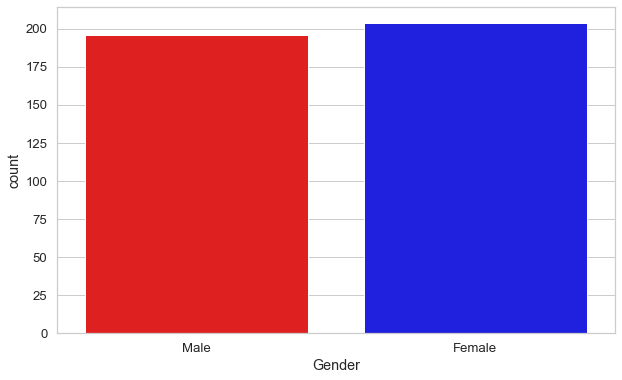

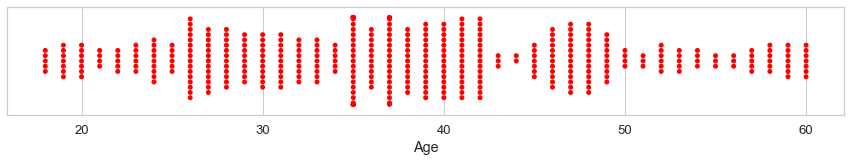

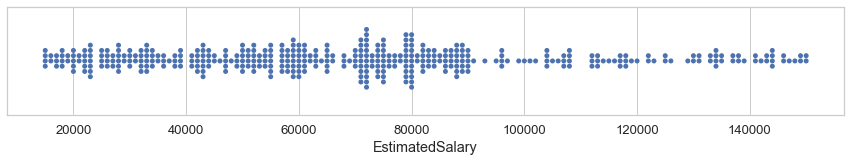

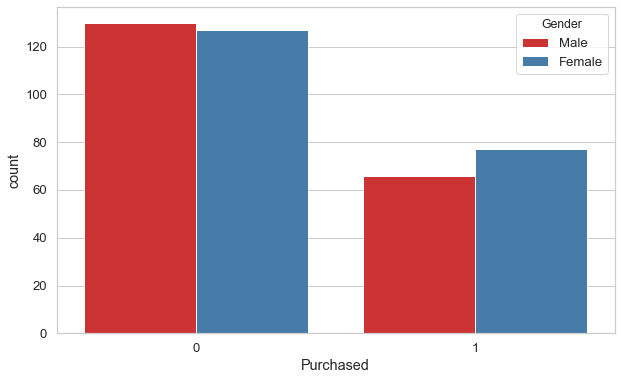

In [88]:
plt.figure(figsize = (10,6))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.countplot(df.Gender, palette = ['red','blue'])
plt.show()

plt.figure(figsize = (15,2))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.swarmplot(df.Age, color = 'red')
plt.show()

plt.figure(figsize = (15,2))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.swarmplot(df.EstimatedSalary)
plt.show()

plt.figure(figsize = (10,6))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.countplot(df.Purchased, hue = df.Gender, palette = 'Set1')
plt.show()

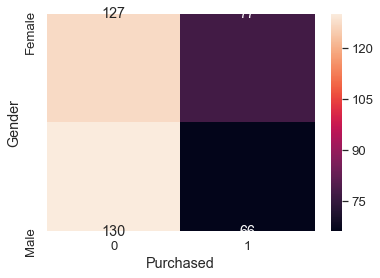

In [98]:
p = pd.crosstab(df.Gender, df.Purchased)
sns.heatmap(p, annot = True, fmt = '.0f')
plt.show()

<hr>

### Creating dependent and independent variables.

In [99]:
X = df.iloc[:, [2,3]].values
y = df.iloc[:,-1].values

### Train Test Split.

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

### Scaling the data.

from sklearn.preprocessing import StandardScaler as SScale
sc = SScale()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Fitting the training data into the classifier.

In [102]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [103]:
classifier = KNN(n_neighbors = 5, metric = 'minkowski', p = 2)
# The default metric is Minkowski and with p = 2, is equivalent to the Standard Euclidean Metric.
# When p = 1, it is equivalent to using Manhattan distance.

In [104]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Making predictions.

In [107]:
predictions = classifier.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

## Confusion Matrix.

In [108]:
from sklearn.metrics import confusion_matrix as CM

cm = CM(y_test, predictions)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

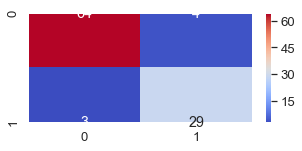

In [109]:
plt.figure(figsize = (5,2))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.heatmap(cm, annot = True, fmt = 'd', cmap ='coolwarm')
plt.show()

##### The classifier has made 7 incorrect predictions.

## Classification Report:

In [110]:
from sklearn.metrics import classification_report as CR

print(CR(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



### Interpretation:

- Precision for 0: 
    - If the item is not purchased, the classifier will predict it accurately 96% of the time.
- Precision for 1: 
    - If the item is purchased, the classifier will predict it accurately 88% of the time.

- Recall for 0: 
    - 94% of all the non-purchasers are correctly predicted by the classifier as non-purchasers.
- Recall for 1: 
    - 91% of all the purchasers are correctly predicted by the classifier as purchasers.

### Visualising the Training set results.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


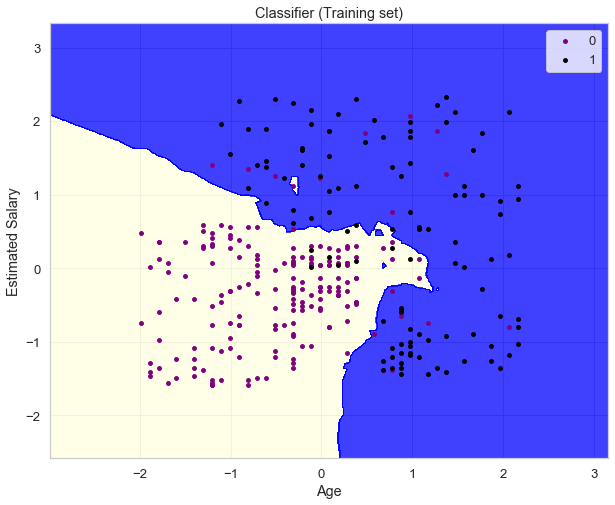

In [113]:
plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid', font_scale = 1.2) 

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('lightyellow', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('purple', 'black'))(i), label = j, s = 15)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the Testing set results.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


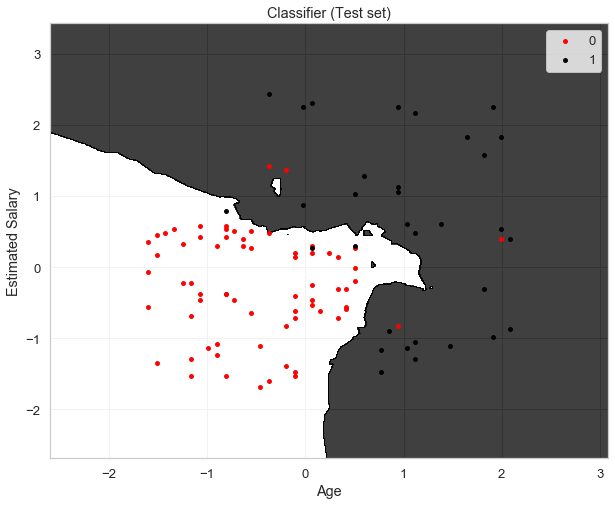

In [112]:
plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid', font_scale = 1.2) 

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('white', 'black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'black'))(i), label = j, s = 15)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<hr>

<hr>

## Optimal value for k.
- There is no strict way of finding the optimal value of k.
- We test it using loops and create confusion matrices and classification reports.

### Fitting the training data into the classifier.

In [131]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import accuracy_score as accScore

for ii in (range(1,82,8)):
    
    classifier = KNN(n_neighbors = ii, metric = 'minkowski', p = 2)
    # The default metric is Minkowski and with p = 2, is equivalent to the Standard Euclidean Metric.
    # When p = 1, it is equivalent to using Manhattan distance.

    classifier.fit(X_train, y_train)
    ### Making predictions.

    predictions = classifier.predict(X_test)
    predictions

    print('For k = ', ii)
    
    ## Confusion Matrix.
    cm = CM(y_test, predictions)
    print('\n', cm, '\n')

    # Accuracy Score.
    
    #sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None

    print((accScore(y_test, predictions)) * 100)
    print('\n')
    

For k =  1

 [[61  7]
 [ 5 27]] 

88.0


For k =  9

 [[64  4]
 [ 3 29]] 

93.0


For k =  17

 [[64  4]
 [ 3 29]] 

93.0


For k =  25

 [[64  4]
 [ 3 29]] 

93.0


For k =  33

 [[64  4]
 [ 3 29]] 

93.0


For k =  41

 [[64  4]
 [ 4 28]] 

92.0


For k =  49

 [[64  4]
 [ 4 28]] 

92.0


For k =  57

 [[64  4]
 [ 6 26]] 

90.0


For k =  65

 [[64  4]
 [ 7 25]] 

89.0


For k =  73

 [[64  4]
 [ 8 24]] 

88.0


For k =  81

 [[65  3]
 [10 22]] 

87.0




##### There is a general pattern that the accuracy score starts from minimum and reaches a peak value and decreases again as the value of k is increased.

### Visualizing the same in a plot.

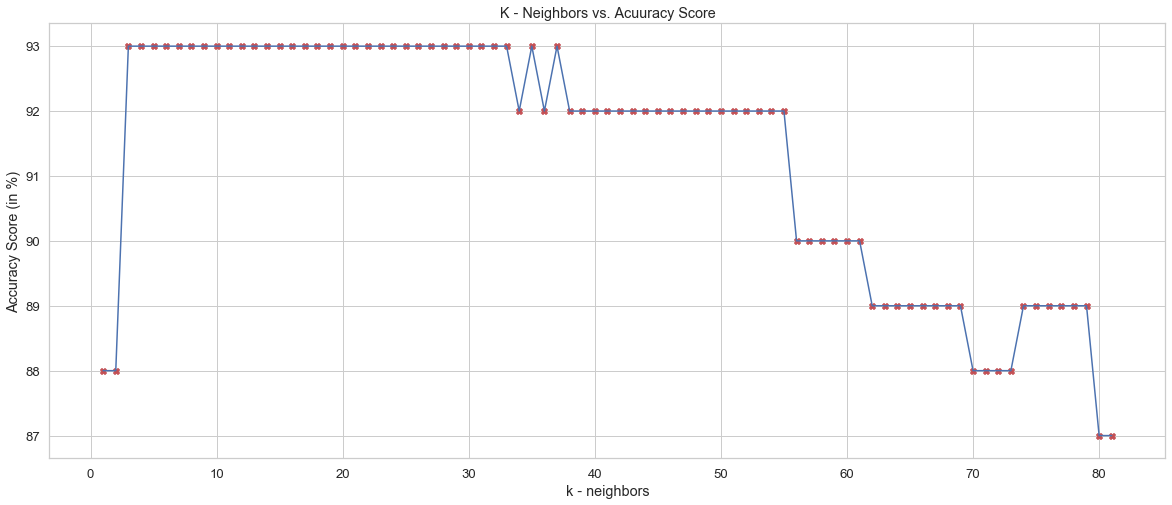

In [151]:
# Setting up a dictionary to store the values.
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import accuracy_score as accScore

acc_scores = dict()
for ii in (range(1,82)):
    
    classifier = KNN(n_neighbors = ii, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    
    # Accuracy Score.
    acc_scores[ii] = (accScore(y_test, predictions)) * 100

# Setting up the plot.
plt.figure(figsize = (20,8))
sns.set(style = 'whitegrid', font_scale = 1.2) 

plt.plot(list(acc_scores.keys()), list(acc_scores.values()))
plt.scatter(list(acc_scores.keys()), list(acc_scores.values()), marker = 'X', color = 'r')
plt.xlabel('k - neighbors')
plt.ylabel('Accuracy Score (in %)')
plt.title('K - Neighbors vs. Acuuracy Score')
plt.show()


# The End.